**Este notebook apresenta um tutorial para a criação de gráfico de barras para variáveis na escala Likert utilizando Python, conforme o exemplo abaixo:**

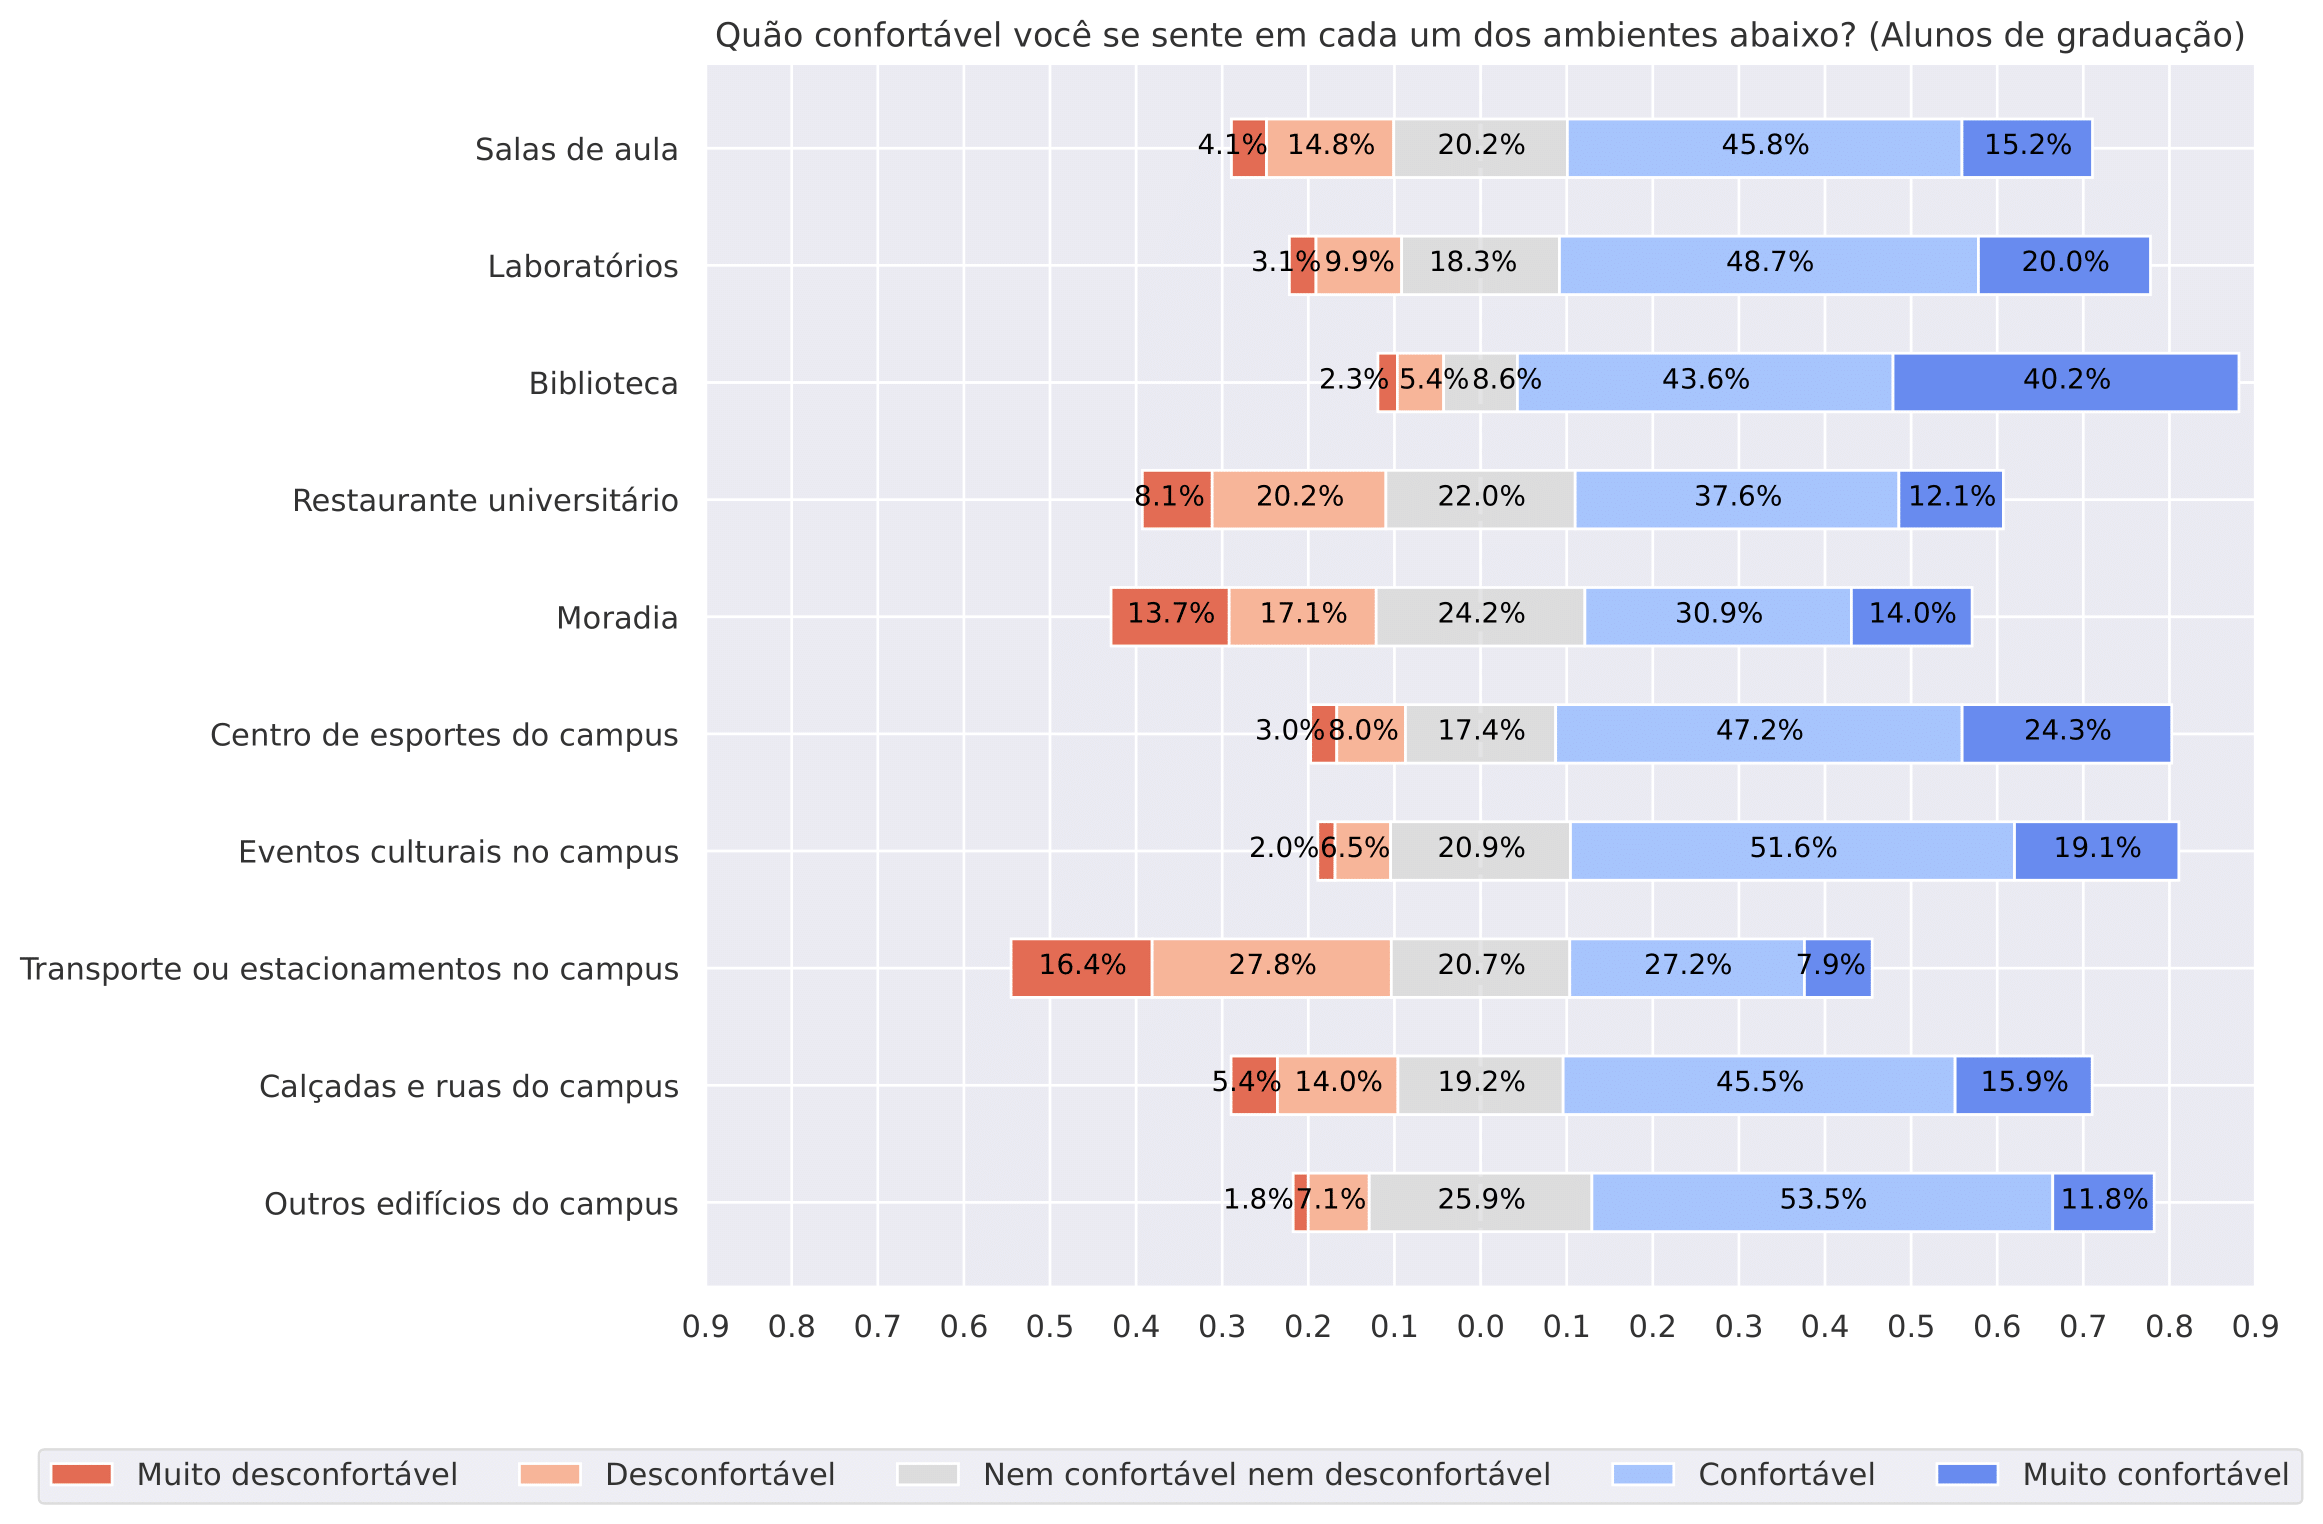

**Figura 3.1.1: Conforto no campus, segundo alunos de graduação (QPRIP, 2024).**



> Veja  mais sobre as Escalas de Likert: https://pt.surveymonkey.com/mp/likert-scale/





---



**Passo 1: Preparar os dados**

In [ ]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar base de dados
df = pd.read_csv('exemplos_QPRIP.csv')

In [ ]:
# Colunas da base de dados utilizadas
colunas = ['Conforto: Salas de aula', 'Conforto: Laboratórios',
       'Conforto: Biblioteca', 'Conforto: Restaurante universitário',
       'Conforto: Moradia', 'Conforto: Centro de esportes do campus',
       'Conforto: Eventos culturais no campus',
       'Conforto: Transporte ou estacionamentos no campus',
       'Conforto: Calçadas e ruas do campus',
       'Conforto: Outros edifícios do campus']

In [ ]:
# Filtrar somente as colunas do gráfico
df_likert = df[colunas].copy()

In [ ]:
# Renomeação de colunas (como aparecerão no gráfico)
df_likert.rename(columns={coluna: coluna.replace('Conforto: ', '') for coluna in colunas}, inplace=True) # retirada do prefixo "Conforto: "

In [ ]:
# Correção ortográfica nos valores
df_likert.replace({
        'Não sei/ Não se aplica': 'Não sei/Não se aplica',
        'Nem confortável  nem  desconfortável': 'Nem confortável nem desconfortável',
        'Muito  confortável': 'Muito confortável',
        'Não se aplica': 'Não sei/Não se aplica'
    }, inplace=True)

---

**Passo 2: Geração de tabelas**

**Tabela de “Não sei/Não se aplica"**

In [ ]:
# Frequência relativa de “Não sei/Não se aplica"
tabela_nao_sei_nao_se_aplica = df_likert.apply(
    lambda coluna: coluna.value_counts(normalize=True).get('Não sei/Não se aplica', 0)
)

# Transformar na base 100 com duas casas decimais e com '%'
tabela_nao_sei_nao_se_aplica = (tabela_nao_sei_nao_se_aplica * 100).round(2).astype(str) + '%'

# Nome do das linhas
tabela_nao_sei_nao_se_aplica.index.name = 'Local'

# Nome da coluna
tabela_nao_sei_nao_se_aplica.name = 'Não sei/Não se aplica'

# Exibição
tabela_nao_sei_nao_se_aplica

,Não sei/Não se aplica
Local,
Salas de aula,19.0%
Laboratórios,37.8%
Biblioteca,23.8%
Restaurante universitário,22.6%
Moradia,80.4%
Centro de esportes do campus,49.6%
Eventos culturais no campus,45.0%
Transporte ou estacionamentos no campus,27.6%
Calçadas e ruas do campus,19.0%


**Tabela de Frequência Relativa desconsiderando “Não sei/Não se aplica”**



> Os valores “Não sei/Não se aplica” foram desconsiderados por serem pouco informativos e pela alta frequência na amostra, como em Moradia e Centro de esportes no campus.



In [ ]:
# Tabela de Frequência relativa normalizada após retirar “Não sei/Não se aplica”
tabela_likert = (
        df_likert.replace({'Não sei/Não se aplica': np.nan})
        .apply(lambda coluna: coluna.value_counts(normalize=True))
        .T
    )

# Organização dos valores (mais negativo para o mais positivo)
tabela_likert = tabela_likert[['Muito desconfortável', 'Desconfortável', 'Nem confortável nem desconfortável', 'Confortável', 'Muito confortável']]

# Exibição
tabela_likert

,Muito desconfortável,Desconfortável,Nem confortável nem desconfortável,Confortável,Muito confortável
Local,,,,,
Salas de aula,0.027160,0.128395,0.162963,0.459259,0.222222
Laboratórios,0.035370,0.099678,0.151125,0.463023,0.250804
Biblioteca,0.026247,0.060367,0.086614,0.448819,0.377953
Restaurante universitário,0.062016,0.191214,0.193798,0.428941,0.124031
Moradia,0.204082,0.163265,0.153061,0.367347,0.112245
Centro de esportes do campus,0.035714,0.067460,0.146825,0.496032,0.253968
Eventos culturais no campus,0.018182,0.058182,0.130909,0.578182,0.214545
Transporte ou estacionamentos no campus,0.176796,0.237569,0.196133,0.295580,0.093923
Calçadas e ruas do campus,0.059259,0.153086,0.172840,0.449383,0.165432


---

**Parte 3: Gerar gráfico na escala likert**

In [ ]:
# Função para gerar o gráfico que leva como parâmetro apenas a tabela likert calculada e o título do gráfico
def grafico_likert(tabela_likert, titulo):
    sns.set_theme(style="darkgrid")  # Estilo do gráfico com fundo grade escura
    mpl.rcParams['pdf.fonttype'] = 42  # Fonte vetorial para PDF

    # Pré-processamento dos dados da tabela likert
    stacked_df = tabela_likert.stack(level=-1)  # Empilha colunas (nível -1)
    dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()  # Converte para dicionário
    results = dict(sorted(dic.items(), key=lambda x: tabela_likert.index.tolist().index(x[0])))  # Ordena como no índice original
    category_names = tabela_likert.columns  # Nomes das categorias (colunas)

    labels = list(results.keys())  # Itens da pergunta (linhas)
    data = np.array(list(results.values()))  # Dados como array
    data_cum = data.cumsum(axis=1)  # Soma acumulada para empilhar
    middle_index = data.shape[1] // 2  # Índice central da escala
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index] / 2  # Offset para centralizar

    category_colors = plt.get_cmap('coolwarm_r')(np.linspace(0.15, 0.85, data.shape[1]))  # Cores interpoladas

    fig, ax = plt.subplots(figsize=(10, 9))  # Tamanho da figura

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]  # Largura da barra
        starts = data_cum[:, i] - widths - offsets  # Início da barra
        ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)  # Desenha a barra

    ax.axvline(0, linestyle='--', color='white', alpha=.25)  # Linha de referência central

    ax.set_xlim(-0.9, 0.9)  # Limites do eixo X
    ax.set_xticks(np.arange(-0.9, 1, 0.1))  # Marcas do eixo X
    ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(abs(x)))  # Formato sem sinal

    ax.invert_yaxis()  # Primeiro item no topo
    plt.legend(title='', bbox_to_anchor=(0.3, -0.12), loc='upper center', ncol=5)  # Legenda abaixo

    # Junta os valores da tabela original para exibir nas barras
    values = []
    for key in tabela_likert:
        values += list(tabela_likert[key])

    # Insere os textos com os percentuais nas barras
    for i, rec in enumerate(ax.patches):
        kx = -0.05
        ky = 0.05

        # Ajustes manuais (caso os percentuais fiquem sobrepostos)
        if i == 0: kx = -0.06
        if i == 1: kx = -0.06
        if i == 2: kx = -0.08
        if i == 5: kx = -0.08
        if i == 6: kx = -0.1
        if i == 9: kx = -0.09
        if i == 11: kx = -0.04
        if i == 12: kx = -0.025
        if i == 21: kx = -0.06
        if i == 22: kx = -0.01

        ax.text(
            rec.get_x() + rec.get_width() / 2 + kx,
            rec.get_y() + rec.get_height() / 2 + ky,
            '{:.1%}'.format(values[i]),
            fontsize=10,
            color='black'
        )

    plt.subplots_adjust(bottom=0.2)  # Espaço para legenda
    ax.set_title(titulo)  # Título do gráfico

    return fig  # Retorna a figura e o eixo

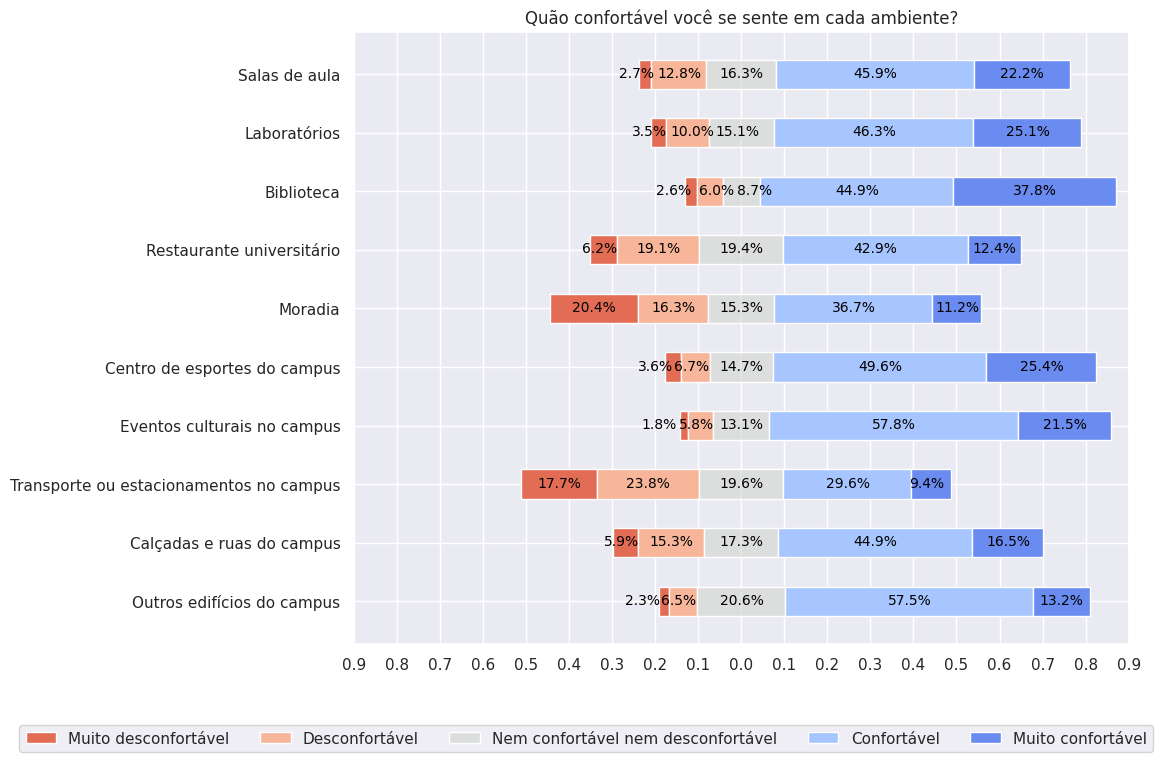

In [ ]:
# Chamada da função
fig = grafico_likert(tabela_likert, "Quão confortável você se sente em cada ambiente?")
fig.show()

In [ ]:
# Salvar em pdf acessível para leitores de telas
fig.savefig('conforto_exemplo.pdf', bbox_inches='tight', dpi=300)